# Uber Trip Analysis

### Problem Statement

**Uber has a constant imbalance in the demand and supply of rides which promotes poor customer retention**. To achieve a balance and ensure there is a  sufficient supply of rides to match the demand of customers, we will identify peak hours of the day in the most occurring start locations. This will help to know the locations to dispatch more riders to and what hours to do so. Customer satisfaction and customer retention will increase in such areas, and once this is achieved, it'll mean more profit for Uber.

### Project Description

The aim of this project is to carryout an Exploratory Data Analysis (EDA) on an Uber trips dataset from New York to derive insights and patterns on which location and day(s) have the highest and the lowest trips or the busiest hour.  New York has a highly complex transportation system coupled with a large residential populace.

We are going to be make use of the Jupyter notebook and the python libraries for data manipulation and visualization.

In [1]:
#import python libraries for data manipulation and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Inspection

In [6]:
#loading the data
uber_trips = pd.read_csv('uber_drives.csv')

In [7]:
uber_trips.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [8]:
uber_trips.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [9]:
#Dimensions of the Data frame
uber_trips.shape

(1156, 7)

In [10]:
#Size of the dataset
uber_trips.size

8092

In [11]:
#Dataset Description
uber_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


## Inspection Result

In [12]:
uber_trips.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [13]:
# Summary Statistics of original datset
uber_trips.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [14]:
start_dest = uber_trips['START*'].dropna()
unique_start = set(start_dest)
unique_start
len(unique_start)

177

In [15]:
stop_dest = uber_trips['STOP*'].dropna()
unique_stop = set(stop_dest)
len(unique_stop)

188

## Data Cleaning

In [16]:
uber = uber_trips.copy()
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [17]:
#Checking for availability of any null values
uber.isnull().values.any()

True

In [18]:
# Number of missing values are present
uber.isnull().values.sum()

507

In [19]:
# Dropping NAN values
uber.dropna(inplace=True)
uber


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [20]:

uber.rename(columns = {'START_DATE*':'Start_Date', 'END_DATE*':'End_Date',
                              'CATEGORY*':'Category', 'START*':'Start', 'STOP*':'Stop', 'MILES*':'Miles', 'PURPOSE*':'Purpose'}, inplace = True)

In [21]:

uber.head()

,Start_Date,End_Date,Category,Start,Stop,Miles,Purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [22]:
import datetime 
import calendar

In [23]:
uber['Start_Date'] = pd.to_datetime(uber['Start_Date'], format="%m/%d/%Y %H:%M")
uber['End_Date'] = pd.to_datetime(uber['End_Date'], format="%m/%d/%Y %H:%M")
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]
for x in uber['Start_Date']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])
uber['HOUR']=hour
uber['DAY']=day
uber['DAY_OF_WEEK']=dayofweek
uber['MONTH']=month
uber['WEEKDAY']=weekday

In [24]:
uber.head()

,Start_Date,End_Date,Category,Start,Stop,Miles,Purpose,HOUR,DAY,DAY_OF_WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [25]:
uber.dtypes

Start_Date     datetime64[ns]
End_Date       datetime64[ns]
Category               object
Start                  object
Stop                   object
Miles                 float64
Purpose                object
HOUR                    int64
DAY                     int64
DAY_OF_WEEK             int64
MONTH                   int64
WEEKDAY                object
dtype: object

# Data Visualization

## Univariate Analysis

In [28]:
#function to display values on each plot
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

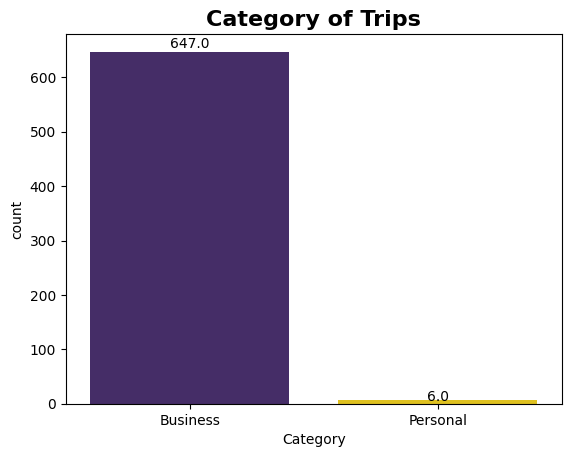

In [29]:
#plot for category column
a = sns.countplot(x='Category', data=uber, palette=['#432371', 'gold'])
plt.title('Category of Trips', weight='bold').set_fontsize('16')
show_values(a)

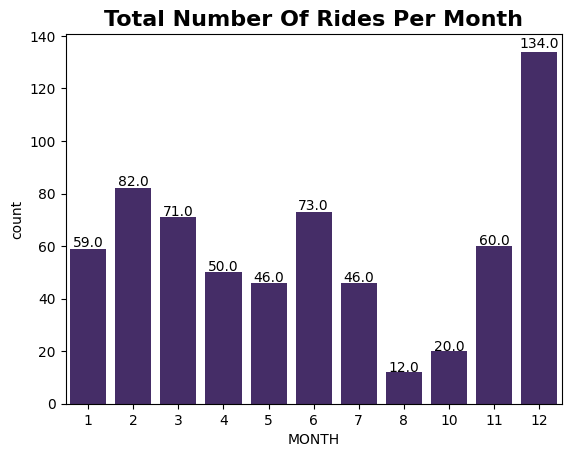

In [32]:
#Plot for number of trips in a month
a = sns.countplot(x='MONTH', data=uber, palette=['#432371'])
plt.title('Total Number Of Rides Per Month', weight='bold').set_fontsize('16')
show_values(a)

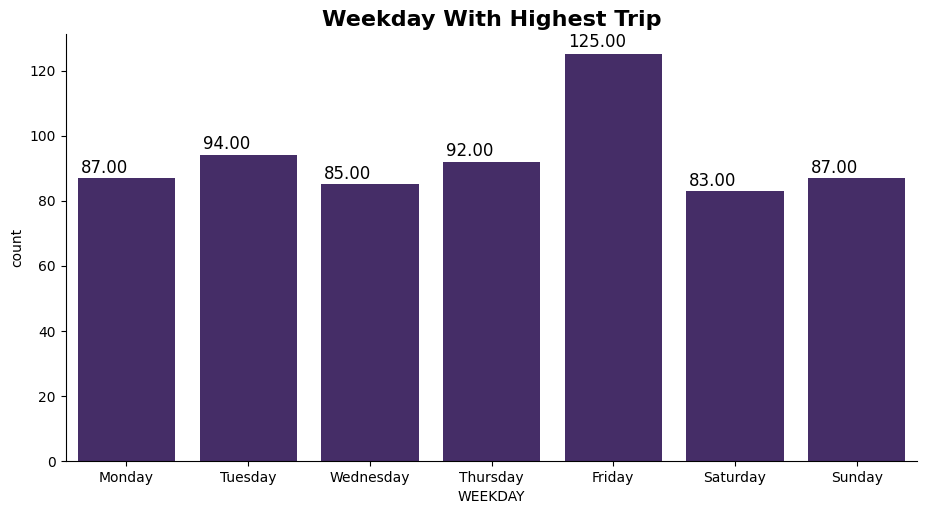

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of weekdays
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plot to see the weekday with the highest trip
g = sns.catplot(data=uber, x="WEEKDAY", kind="count", palette=sns.color_palette(['#432371']), aspect=15/8, order=order)
plt.title('Weekday With Highest Trip', weight='bold').set_fontsize('16')

# Function to display values
ax = g.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.025, p.get_height() * 1.02, '{0:.2f}'.format(p.get_height()), color='black', rotation='horizontal', size='large')


In [35]:
uber.WEEKDAY.value_counts()

WEEKDAY
Friday       125
Tuesday       94
Thursday      92
Sunday        87
Monday        87
Wednesday     85
Saturday      83
Name: count, dtype: int64

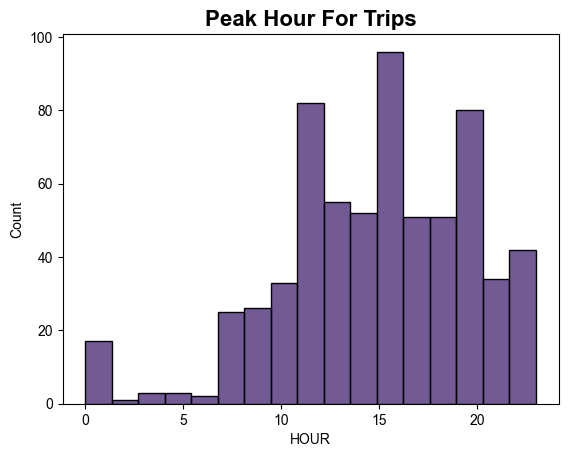

In [37]:
# Timeframe where Uber is most ordered
sns.histplot(x='HOUR', data=uber, color='#432371').set(title='HOUR MOST PEOPLE USE UBER')
sns.set(rc={'figure.figsize': (10, 8)})
plt.title('Peak Hour For Trips', weight='bold').set_fontsize('16')


Within the hours of 1pm - 4pm, the drivers appear to be busiest.


**This shows hour of the day most people order Uber to their destination**

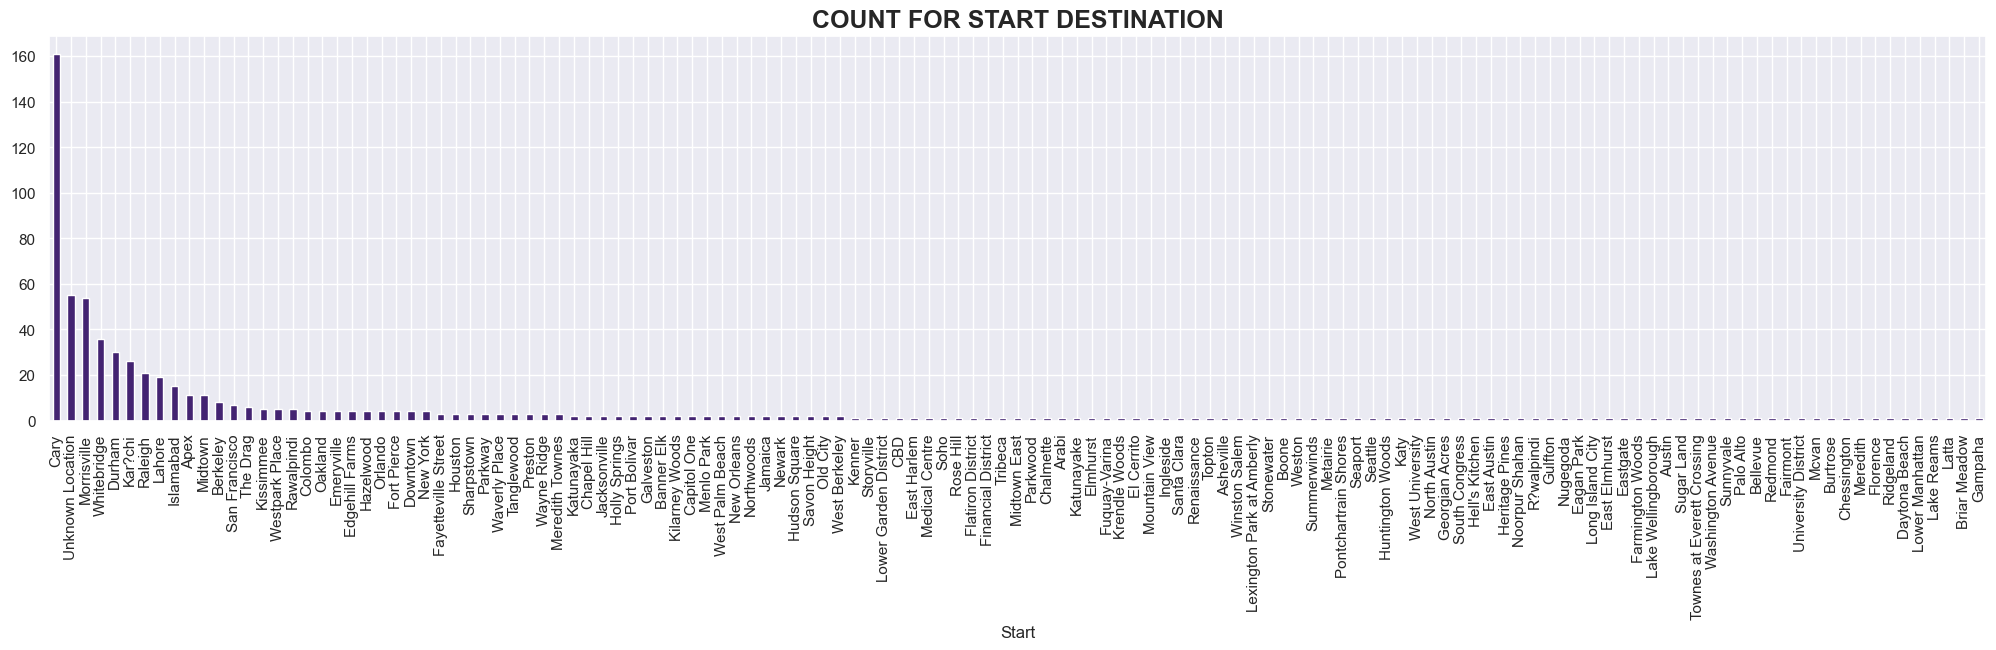

In [38]:
#plot to check travel milage for each start destination
uber['Start'].value_counts().plot(kind='bar', figsize=(25,5),color='#432371')
plt.title('COUNT FOR START DESTINATION', weight='bold').set_fontsize('18')

The highest number of people which use Uber are located in Cary city. So we need to ensure there is provision for enough cabs in that city. Also, more should be invested in advertisement to improve patronage.

In [39]:
uber.Start.value_counts()

Start
Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
                   ... 
Lower Manhattan       1
Lake Reams            1
Latta                 1
Briar Meadow          1
Gampaha               1
Name: count, Length: 131, dtype: int64

## Bivariate Analysis



### Purpose of trips vs distance

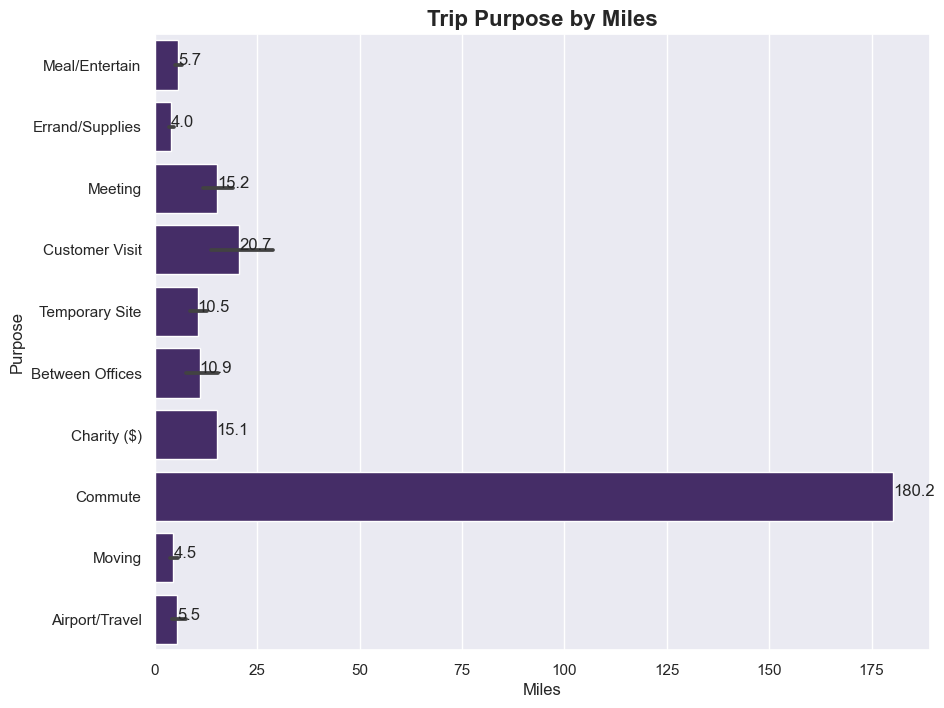

In [42]:
# Purpose of trips against miles
df = uber.reset_index()  # Assuming 'uber' is your DataFrame
a = sns.barplot(x=df['Miles'], y=df['Purpose'], palette=['#432371'])
plt.title('Trip Purpose by Miles', weight='bold').set_fontsize('16')
show_values(a, "h", space=0)


Most people use Uber for Meetings followed by customer visit.

### Bivariate of Weekday v Category

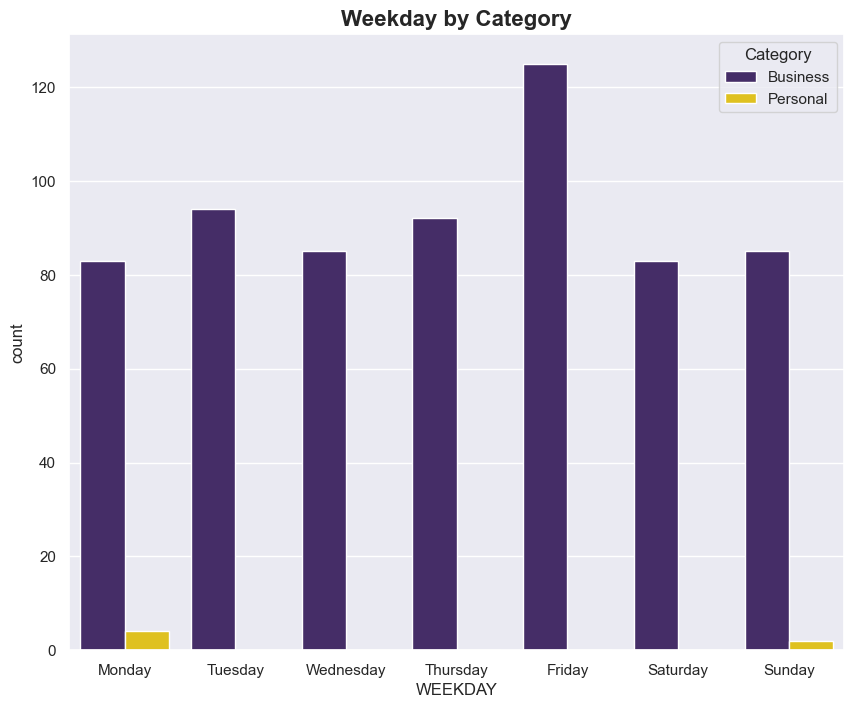

In [44]:
#Plot of weekday against Category
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday","Sunday"]
sns.countplot(x='WEEKDAY', data=uber, hue='Category', order=order, palette=['#432371','gold']).set_title('Weekday by Category', weight='bold').set_fontsize('16')


The weekdays is predominantly replete with business rides, together with pockets of personal transits on Mondays and Sundays.

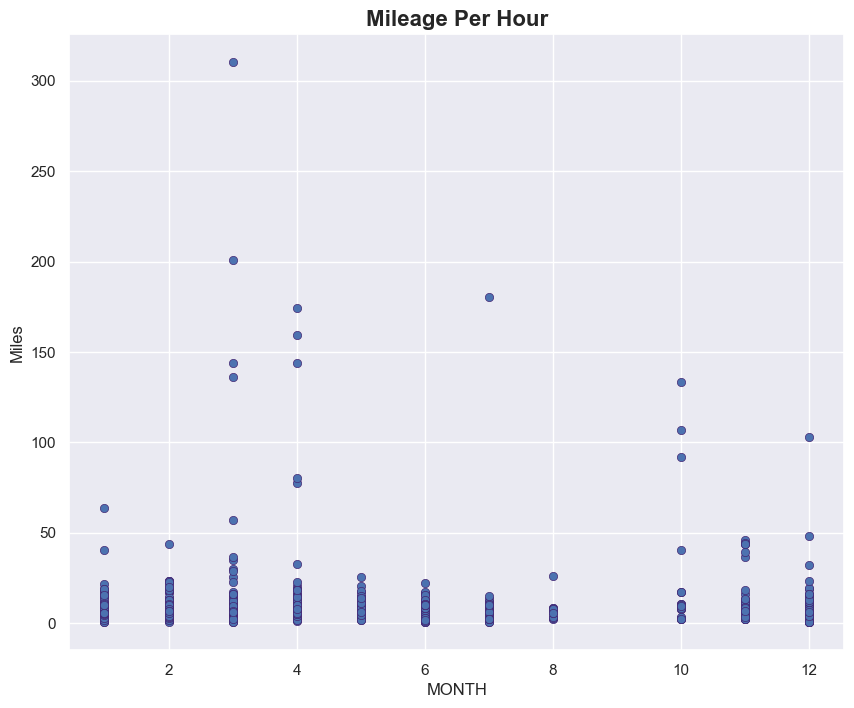

In [46]:
sns.scatterplot(x='MONTH', y='Miles', data=uber, edgecolor='#432371')
plt.title('Mileage Per Hour', weight='bold').set_fontsize('16')


The highest milage recorded by Uber was in the 3rd month - March.

## Multivariate Analysis



## **What is the relationship between the hour of the day, distance traveled and the day of the week?**

<Axes: xlabel='HOUR', ylabel='Miles'>

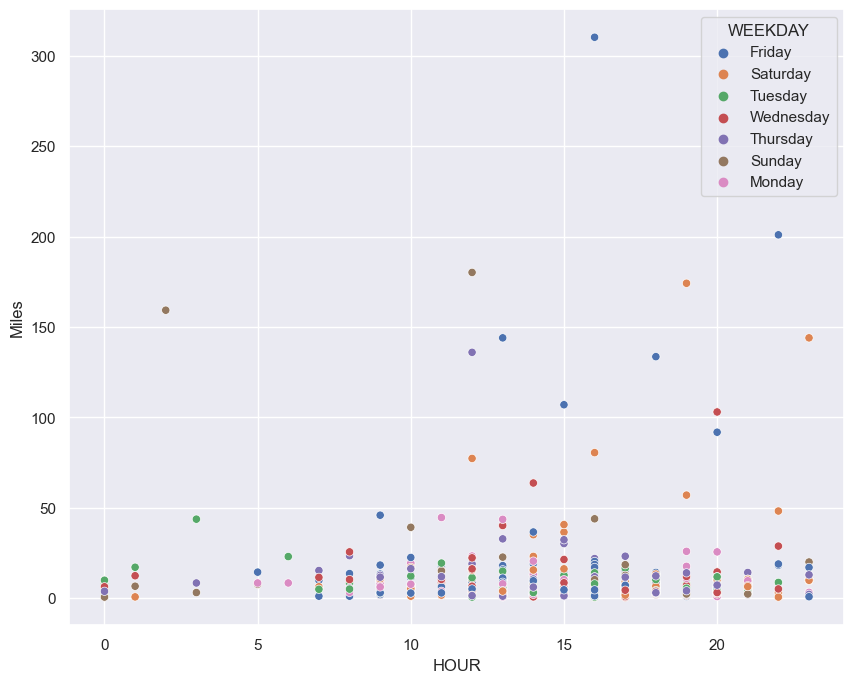

In [47]:
#multivariate analysis cells:" hour v weekday v miles"
sns.scatterplot(x='HOUR', y='Miles',hue='WEEKDAY',data=uber, palette='deep')


It appears that the highest milage that occured in the month of March was on a Friday, and on the 4pm mark.
This tallies with our univariate hour histplot.

In [49]:
# Select only numeric columns
numeric_columns = uber.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)


                Miles      HOUR       DAY  DAY_OF_WEEK     MONTH
Miles        1.000000 -0.004370  0.022724     0.104710 -0.067137
HOUR        -0.004370  1.000000 -0.053598     0.039669  0.095491
DAY          0.022724 -0.053598  1.000000     0.021694  0.160147
DAY_OF_WEEK  0.104710  0.039669  0.021694     1.000000 -0.054480
MONTH       -0.067137  0.095491  0.160147    -0.054480  1.000000


Text(0.5, 1.0, 'Correlation between Miles, Hour, Day, Day_of_Week, and Month')

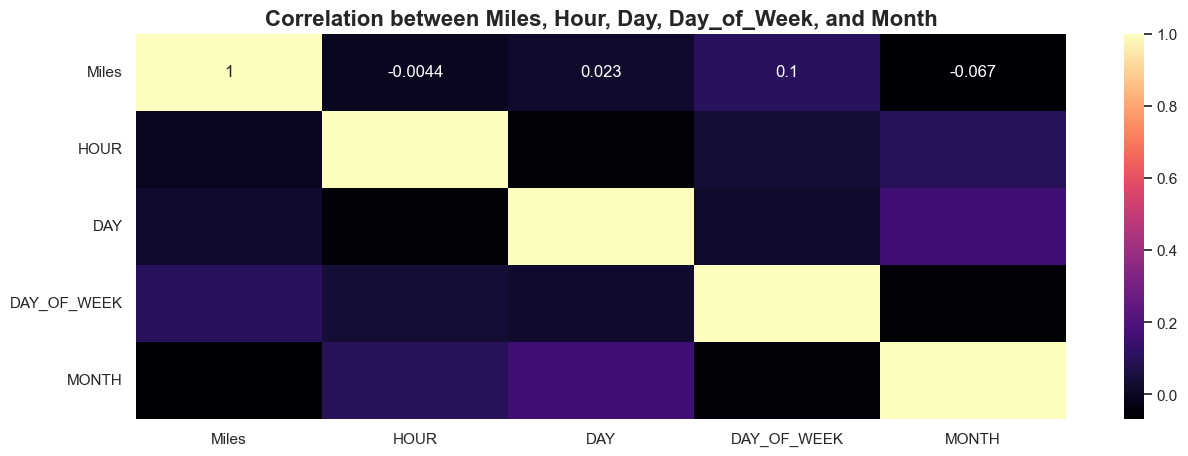

In [51]:
# Select only the relevant numeric columns
numeric_columns = uber[['Miles', 'HOUR', 'DAY', 'DAY_OF_WEEK', 'MONTH']]

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create the heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(correlation_matrix, cmap='magma', annot=True)
plt.title('Correlation between Miles, Hour, Day, Day_of_Week, and Month', weight='bold', fontsize=16)


The correlation that exist between miles, hour, weekday, day and month is either low negative correlation or low positive correlation.

Therefore, is no strong correlation between miles, hour, weekday, day and month.

/var/folders/n4/d6h4j3h95x333c3mmcxh697w0000gn/T/ipykernel_14343/4065339294.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['Miles'] = pd.to_numeric(numeric_data['Miles'], errors='coerce')


Text(0.5, 1.0, 'Mean count with regards to Miles, Hour, Day, Day_of_Week, and Month')

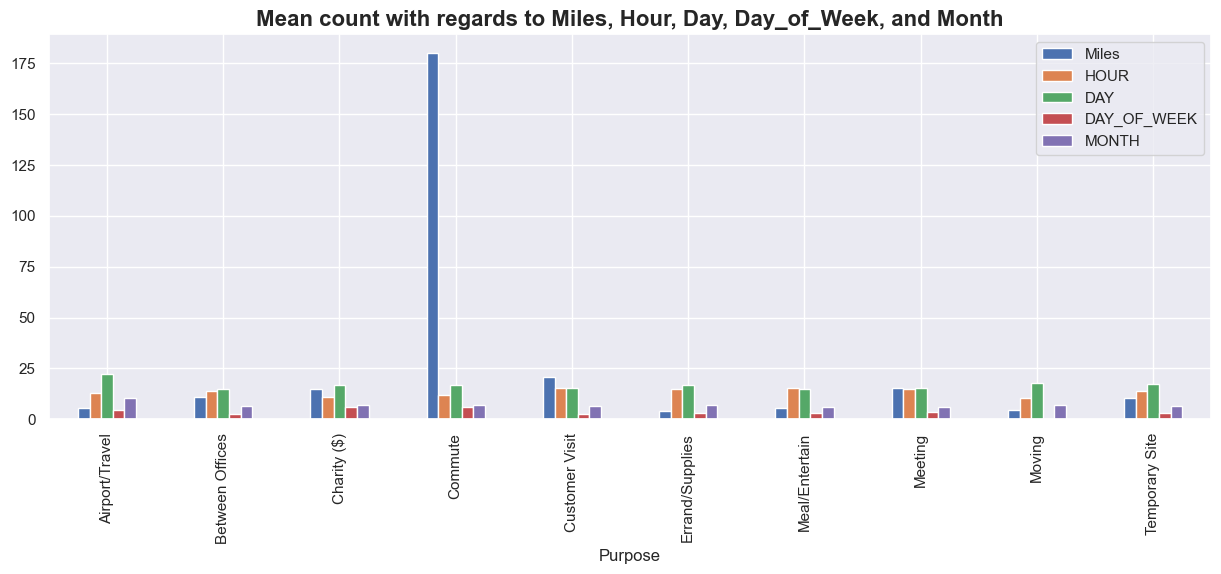

In [53]:
# Select only the relevant columns for calculation
columns = ['Purpose', 'Miles', 'HOUR', 'DAY', 'DAY_OF_WEEK', 'MONTH']

# Filter the DataFrame to include only these columns
numeric_data = uber[columns]

# Convert the 'Miles' column to numeric (remove non-numeric entries)
numeric_data['Miles'] = pd.to_numeric(numeric_data['Miles'], errors='coerce')

# Group by 'Purpose' and calculate the mean for each purpose
mean_purpose = numeric_data.groupby('Purpose').mean()

# Create a bar plot
mean_purpose.plot(kind='bar', figsize=(15, 5))
plt.title('Mean count with regards to Miles, Hour, Day, Day_of_Week, and Month', weight='bold', fontsize=16)


# Summary

1. The highest pick-up point location is Cary. 
2. The day of the week with most patronage is Friday, and the least is being Saturday.
3. 1pm - 4pm is the time with the highest surge. 
4. Most of the start & stop transit is between Cary and Morrisville. 
5. Most trips are for business. 
6. It appears that the highest milage that occured in the month of March was on a Friday, and on the 4pm mark. This tallies with our univariate hour histplot.

# Suggested Action Points

1. Uber needs to station or contract more drivers within Cary city to minimize waiting times, especially within the hours of 1pm - 4pm; hence, boosting customer satisfaction.

2. With more cars available in the cities of most traffics on Fridays, there definitely will be a good customer satisfaction feedback.

3. For locations with very little patronage like Gampaha, Latta, and Briar Meadows, Uber can attempt to run marketing campaigns like Ads on mobile apps or youtube within those catchments.

